import pandas as pd
df = pd.read_csv("clean_df.csv")

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("clean_df.csv", low_memory=False)

In [3]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
df.head()

,Unnamed: 0,level_0,index,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,0,0,7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
1,1,1,8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
2,2,2,10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
3,3,3,11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982
4,4,4,12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983


TOP BY MAKER

In [7]:
df['Make'].value_counts().head(20)

Make
cessna               21354
piper                12415
beech                 4447
boeing                1973
grumman               1484
mooney                1239
bellanca               890
air tractor            655
aeronca                495
maule                  495
champion               444
bell                   392
stinson                390
mcdonnell douglas      370
luscombe               355
aero commander         352
taylorcraft            316
de havilland           311
rockwell               300
north american         297
Name: count, dtype: int64

In [36]:
sum_fatal_inj = df['Total.Fatal.Injuries'].sum()
sum_serious_inj = df['Total.Serious.Injuries'].sum()
sum_minor_inj = df['Total.Minor.Injuries'].sum()

In [37]:
total_injuries = sum_fatal_inj +sum_serious_inj + sum_minor_inj

In [21]:
df['Make'].value_counts().head()

Make
cessna     21354
piper      12415
beech       4447
boeing      1973
grumman     1484
Name: count, dtype: int64

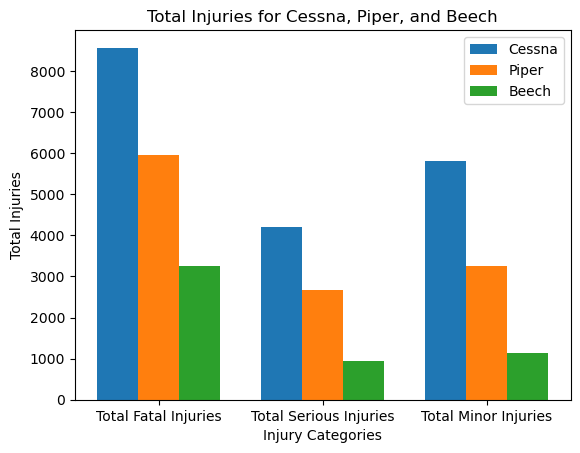

In [17]:
cessna_data = df[df['Make'] == 'cessna']
piper_data = df[df['Make'] == 'piper']
beech_data = df[df['Make'] == 'beech']

# Sum the columns for each aircraft type
cessna_totals = cessna_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
piper_totals = piper_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
beech_totals = beech_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Create a bar graph
categories = np.arange(len(cessna_totals))  # Use NumPy to create an array of indices
bar_width = 0.25  # Adjust the bar width as needed

plt.bar(categories, cessna_totals, width=bar_width, label='Cessna')
plt.bar(categories + bar_width, piper_totals, width=bar_width, label='Piper')  # Adjust x-coordinates
plt.bar(categories + 2 * bar_width, beech_totals, width=bar_width, label='Beech')  # Adjust x-coordinates

# Add labels to the x-axis
plt.xticks(categories + bar_width, ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries'])


# Add labels and title
plt.xlabel('Injury Categories')
plt.ylabel('Total Injuries')
plt.title('Total Injuries for Cessna, Piper, and Beech')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [123]:
#Filter
df[df['Engine.Type'] == 'Turbo Fan']


#Total Turbo Fan Injuries 
turbo_fan_column = df[df['Engine.Type'] == 'Turbo Fan']
turbo_fan_injuries = turbo_fan_column[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()
turbo_fan_injuries_total = turbo_fan_injuries.sum()


#Total Turbo Fan "FATAL" Injuries 
turbo_fan_fatal_injuries = turbo_fan_column[['Total.Fatal.Injuries']]
turbo_fan_fatal_total = turbo_fan_fatal_injuries.sum()
turbo_fan_fatal_total


#Calculate %

turbo_fan_fatal_percent = (turbo_fan_fatal_total / turbo_fan_injuries_total) * 100

turbo_fan_fatal_percent

Total.Fatal.Injuries    2.638924
dtype: float64

In [120]:
#Filter
df[df['Engine.Type'] == 'Turbo Jet']


#Total Turbo Jet Injuries 
turbo_jet_column = df[df['Engine.Type'] == 'Turbo Jet']
turbo_jet_injuries = turbo_fan_column[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()
turbo_jet_injuries_total = turbo_jet_injuries.sum()


#Total Turbo Jet "FATAL" Injuries 
turbo_jet_fatal_injuries = turbo_jet_column[['Total.Fatal.Injuries']]



turbo_jet_fatal_total = turbo_jet_fatal_injuries.sum().astype(int)


#Calculate %

turbo_jet_fatal_percent = (turbo_jet_fatal_total / turbo_jet_injuries_total) * 100

turbo_jet_fatal_percent


Total.Fatal.Injuries    1.042193
dtype: float64

Text(0.5, 1.0, 'Percent of Fatal Injury by Engine Type')

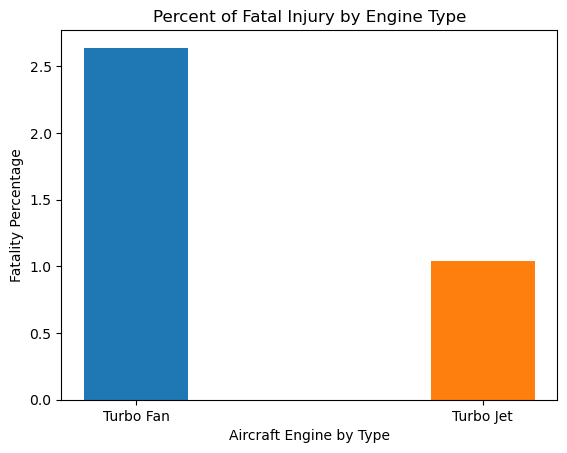

In [131]:
Turbo_Jet_Cat = ['Turbo Jet']
Turbo_Fan_Cat = ['Turbo Fan']


#plt.bar([Turbo_Fan_Cat[0], Turbo_Jet_Cat[0]], [turbo_fan_fatal_percent, turbo_jet_fatal_percent], width=bar_width, label='Fatal Percentage', color=['green', 'blue'])
bar_width = 0.3

plt.bar(Turbo_Fan_Cat, turbo_fan_fatal_percent, width=bar_width, label='Turbo Fan')
plt.bar(Turbo_Jet_Cat, turbo_jet_fatal_percent, width=bar_width, label='Turbo Jet')


# Add labels and title
plt.xlabel('Aircraft Engine by Type')
plt.ylabel('Fatality Percentage')
plt.title('Percent of Fatal Injury by Engine Type')

AIRPLANE MAKER DAMAGE BY WEATHER

In [137]:
############ 'boeing' Filter ##############
boeing_flights = df[df['Make'] == 'boeing']
boeing_turbo_jets = boeing_flights[(boeing_flights['Engine.Type'].isin(['Turbo Fan','Turbo Jet']))]
triple_boeing_engines = boeing_turbo_jets[(boeing_turbo_jets['Number.of.Engines'] == 3)]
boeing_engines_destroyed  = triple_boeing_engines[(triple_boeing_engines['Aircraft.damage'] == 'Destroyed')]




#Convert total 'boeing' destroyed to int

num_destroyed_boeing = len(boeing_engines_destroyed)
num_triple_boeing_engines = len(triple_boeing_engines)



#Get 'boeing' Percentage
boeing_destroyed_percent = (num_destroyed_boeing / num_triple_boeing_engines) * 100







############## 'lockheed' Filter #################

lockheed_flights = df[df['Make'] == 'lockheed']
lockheed_turbo_jets = lockheed_flights[(lockheed_flights['Engine.Type'].isin(['Turbo Fan','Turbo Jet']))]
triple_lockheed_engines = lockheed_turbo_jets[(lockheed_turbo_jets['Number.of.Engines'] == 3)]
lockheed_engines_destroyed  = triple_lockheed_engines[(triple_lockheed_engines['Aircraft.damage'] == 'Destroyed')]


#Convert total Lockheed destroyed to int
num_destroyed_lockheed = len(lockheed_engines_destroyed)
num_triple_lockheed_engines = len(triple_lockheed_engines)

#Get Lockheed Percentage
lockheed_destroyed_percent = (num_destroyed_lockheed / num_triple_lockheed_engines) * 100







############# 'mcdonnell douglas' Filter ############

douglas_flights = df[df['Make'] == 'mcdonnell douglas']
douglas_turbo_jets = douglas_flights[(douglas_flights['Engine.Type'].isin(['Turbo Fan','Turbo Jet']))]
triple_douglas_engines = douglas_turbo_jets[(douglas_turbo_jets['Number.of.Engines'] == 3)]
douglas_engines_destroyed  = triple_douglas_engines[(triple_douglas_engines['Aircraft.damage'] == 'Destroyed')]


#Convert total 'mcdonnell douglas' destroyed to int
num_destroyed_douglas = len(douglas_engines_destroyed)
num_triple_douglas_engines = len(triple_douglas_engines)


#Get 'mcdonnell douglas' Percentage
douglas_destroyed_percent = (num_destroyed_douglas / num_triple_douglas_engines) * 100








/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/ronnie/anaconda3/envs/ronnie_dsc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

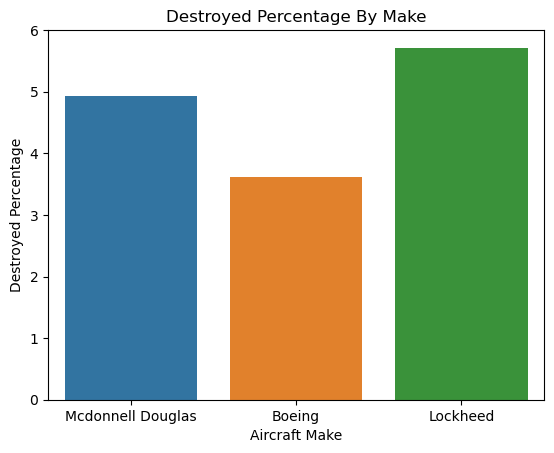

In [134]:
import seaborn as sns
categories = ['Mcdonnell Douglas', 'Boeing', 'Lockheed']
percentages = [douglas_destroyed_percent, boeing_destroyed_percent, lockheed_destroyed_percent]

fig, ax = plt.subplots()

sns.barplot(x = categories, y = percentages, )

ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Destroyed Percentage')
ax.set_title('Destroyed Percentage By Make');

Text(0.5, 1.0, 'Destroyed Percentage By Maker')

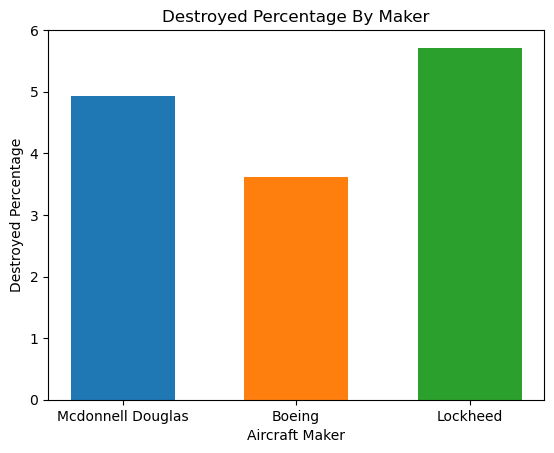

In [116]:
Douglas_Cat = ['Mcdonnell Douglas']
Boeing_Cat = ['Boeing']
Lockheed_Cat = ['Lockheed']



bar_width = 0.60  # Adjust the bar width as needed

plt.bar(Douglas_Cat, douglas_destroyed_percent, width=bar_width, label='Turbo Fan')
plt.bar(Boeing_Cat, boeing_destroyed_percent, width=bar_width, label='Boeing')
plt.bar(Lockheed_Cat, lockheed_destroyed_percent, width=bar_width, label='Lockheed')

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Destroyed Percentage')
plt.title('Destroyed Percentage By Make')